# **Twitter Sentiment Analysis**

Team Members:

Otturu Madhu Murali-CH.EN.U4CYS20053


---


Ravi Theja Yarragoti-CH.EN.U4CYS20084


---


Dinesh Rapuru-CH.EN.U4CYS20063

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import string
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
data=pd.read_csv('/content/1Book1.csv') #loading dataset

In [ ]:
data.count()

target      5652
id          5652
date        5652
NO_QUERY    5652
user        5652
text        5652
dtype: int64

In [ ]:
data.head()

,target,id,date,NO_QUERY,user,text
0,0,1470000000,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1470000000,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1470000000,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1470000000,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1470000000,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.pop("id")
data.pop("date")
data.pop("NO_QUERY")
data.pop("user")

0       scotthamilton
1            mattycus
2             ElleCTF
3              Karoli
4            joy_wolf
            ...      
5647       brandonmcb
5648       mannyrique
5649       styletrain
5650            kscud
5651       kirstenj0y
Name: user, Length: 5652, dtype: object

In [ ]:
data.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


**Data Pre-Processing**

In [ ]:
#This function is for removing the mentions in the tweets
def RemoveMention(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for word in r:
    input_txt=re.sub(word,"",input_txt)
  return input_txt

#This function is for removing Numbers,Special Characters etc..,
def RemoveSpecialCharacters():
  data['z']=data['cleaned_tweet'].str.replace("[^a-zA-Z#]"," ")

#This function is for StopWord Removal
def StopWordRemoval():
  data['cleaned_tweet']=data['cleaned_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))


#Lemmatizing words present in the tweets

def Lemmatization():
  tokanized_tweet=data['cleaned_tweet'].apply(lambda x:x.split())
  print(tokanized_tweet.head())
  lemmatizer=WordNetLemmatizer()
  tokanized_tweet=tokanized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence] )
  for k in range(len(tokanized_tweet)):
    tokanized_tweet[k]=" ".join(tokanized_tweet[k])
  data['cleaned_tweet']=tokanized_tweet


data['cleaned_tweet']=np.vectorize(RemoveMention)(data['text'],"@[\w]*")
RemoveSpecialCharacters()
StopWordRemoval()
Lemmatization()

<ipython-input-119-fb86b3395398>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['z']=data['cleaned_tweet'].str.replace("[^a-zA-Z#]"," ")


0    [upset, that, can't, update, his, Facebook, te...
1    [dived, many, times, for, the, ball., Managed,...
2    [whole, body, feels, itchy, and, like, its, fire]
3    [no,, it's, not, behaving, all., i'm, mad., wh...
4                              [not, the, whole, crew]
Name: cleaned_tweet, dtype: object


In [ ]:
data.head()

,target,text,cleaned_tweet,z
0,0,is upset that he can't update his Facebook by ...,upset that can't update his Facebook texting i...,is upset that he can t update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,dived many time for the ball. Managed save 50%...,I dived many times for the ball Managed to s...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy and like it fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving all. i'm mad. why here? ...",no it s not behaving at all i m mad why am...
4,0,@Kwesidei not the whole crew,not the whole crew,not the whole crew


**Word Cloud of Words present in the dataset according to The frequency**

In [ ]:
all_words="".join([word for word in data['cleaned_tweet']])

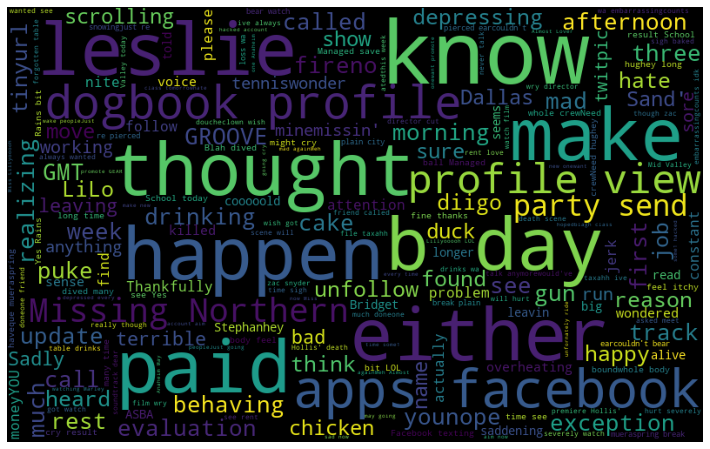

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(data['cleaned_tweet'])

In [ ]:
bow[100].toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**KNN FROM SCRATCH**

In [ ]:
from scipy.stats import mode
from sklearn import preprocessing

In [ ]:
class KNN():
    def __init__( self, K ):
        self.K = K

    def fit( self, X_train, Y_train ):
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape

    def predict( self, X_test ):
        self.X_test = X_test
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros( self.m_test )
        for i in range( self.m_test ):
            x = self.X_test[i]
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            Y_predict[i] = mode(neighbors)[0][0]
        return Y_predict

    def find_neighbors( self, x ):
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ):
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]

    def euclidean( self, x, x_train ):
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

    def score(self,Y_test,Y_pred):
        correctclassification = 0
        count = 0
        for count in range( np.size( Y_pred ) ):
            if Y_test[count] == Y_pred[count]:
                correctclassification = correctclassification + 1
        print("Accuracy using KNN: ", (correctclassification/count))

le = preprocessing.LabelEncoder()
X=le.fit_transform(data['cleaned_tweet'])
Y=le.fit_transform(data['target'])
X=X.reshape(-1,1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
model = KNN(K = 8)
model.fit(X1_train,Y1_train)
knn_pred = model.predict( X1_test )
model.score(Y1_test,knn_pred)

Accuracy using KNN:  0.9946902654867257


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of KNN Algorithm: ")
confusion_matrix(Y1_test,knn_pred)

Confusion Matrix of KNN Algorithm: 


array([[1048,    0],
       [   7,   76]])

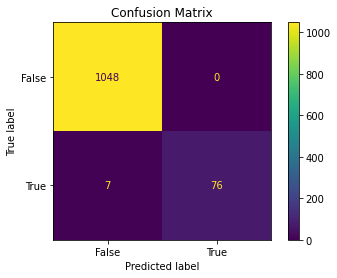

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y1_test,knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Performance Metrics for KNN: \n")
print(classification_report(Y1_test,knn_pred))

Performance Metrics for KNN: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1048
           1       1.00      0.92      0.96        83

    accuracy                           0.99      1131
   macro avg       1.00      0.96      0.98      1131
weighted avg       0.99      0.99      0.99      1131



**SVM**

In [ ]:
Y=data['target']

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(bow, Y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.svm import LinearSVC
SVCModel=LinearSVC()
SVCModel.fit(X2_train,Y2_train)

LinearSVC()

In [ ]:
svc_pred=SVCModel.predict(X2_test)
svc_acc=accuracy_score(svc_pred,Y2_test)

In [ ]:
print("Accuracy Using Support Vector Machine is: ")
svc_acc

Accuracy Using Support Vector Machine is: 


0.9938107869142352

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of SVM Algorithm: ")
confusion_matrix(Y2_test,svc_pred)

Confusion Matrix of SVM Algorithm: 


array([[1048,    0],
       [   7,   76]])

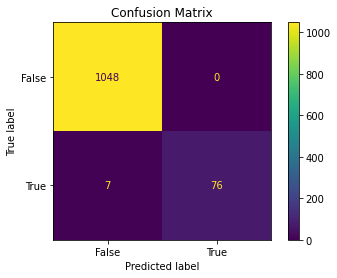

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y2_test,svc_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Performance Metrics for SVM: \n")
print(classification_report(Y2_test,svc_pred))

Performance Metrics for SVM: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1048
           1       1.00      0.92      0.96        83

    accuracy                           0.99      1131
   macro avg       1.00      0.96      0.98      1131
weighted avg       0.99      0.99      0.99      1131



**Naive Bayest**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
y=data['target']
x3_train, x3_test, y3_train, y3_test = train_test_split(bow, y, test_size = 0.5, random_state = 0)
sc = StandardScaler(with_mean=False)
x3_train = sc.fit_transform(x3_train)
x3_test = sc.transform(x3_test)
classifier = MultinomialNB()
classifier.fit(x3_train, y3_train)
nab_pred = classifier.predict(x3_test)
accuracy_nab = accuracy_score(y3_test,nab_pred)
print("Accuracy using Naive Bayes Algorithm is: ",accuracy_nab)

Accuracy using Naive Bayes Algorithm is:  0.9437367303609342


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Naive Bayes Clasifier Algorithm: ")
confusion_matrix(y3_test,nab_pred)

Confusion Matrix of Naive Bayes Clasifier Algorithm: 


array([[2477,  129],
       [  30,  190]])

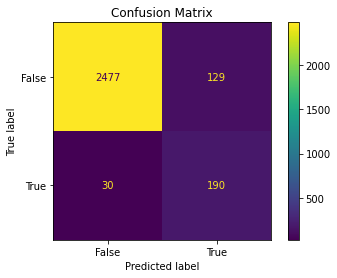

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y3_test,nab_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Performance Metrics for Naive Bayes Classifier: \n")
print(classification_report(y3_test,nab_pred))

Performance Metrics for Naive Bayes Classifier: 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2606
           1       0.60      0.86      0.71       220

    accuracy                           0.94      2826
   macro avg       0.79      0.91      0.84      2826
weighted avg       0.96      0.94      0.95      2826



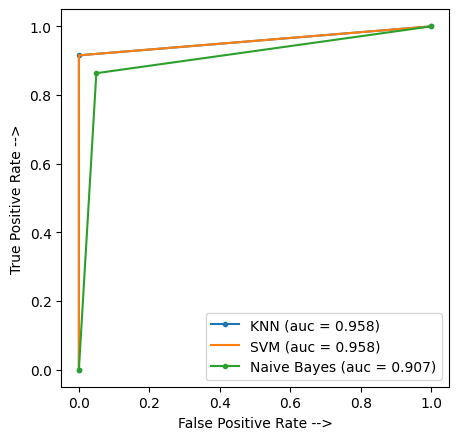

In [ ]:
#AOC ROC CURVES
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(Y1_test,knn_pred)
auc_knn = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(Y2_test, svc_pred)
auc_svm = auc(svm_fpr, svm_tpr)

nab_fpr, nab_tpr, threshold = roc_curve(y3_test,nab_pred)
auc_nab = auc(nab_fpr, nab_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(nab_fpr, nab_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_nab)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('all')